gals Mvir:  [11.536607  12.068592  11.6878605 ...  9.782402   9.782402   9.782402 ]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log10


gals Mvir:  [11.810897 12.498536 11.787931 ...  9.782402  9.782402  9.782402]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log10


gals Mvir:  [12.229415 12.874212 10.584748 ...  9.782402  9.782402  9.782402]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log10


gals Mvir:  [12.315316 13.074735 13.019789 ...  9.782402  9.782402  9.782402]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log10


gals Mvir:  [12.779256 13.110062 10.957588 ...  9.782402  9.782402  9.782402]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log10


gals Mvir:  [12.350421 11.279418 13.210552 ...  9.782402  9.782402  9.782402]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log10


gals Mvir:  [11.90277  14.120914 11.673626 ...  9.782402  9.782402  9.782402]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log10


gals Mvir:  [10.410791 10.374163 11.53421  ...  9.782402  9.782402  9.782402]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log10


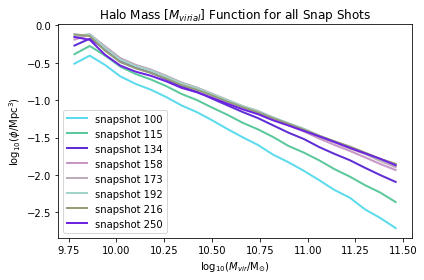

In [4]:
"""Plots for Halo (Mvir) Mass function for all Snaps"""

# import the packages we need
import numpy as np  # work horse package for numerical work in python
import matplotlib.pyplot as plt # plotting library
from dragons import meraxes, munge# DRAGONS modules for reading and dealing with model ouput

fname_in = "imapping_testrun/meraxes.hdf5" # Get the file name for the meraxes file we are using
h = meraxes.set_little_h(0.7)# By specifying Hubble parameter: h=0.7, we are ensuring that all of the galaxy properties

# Read in all the snap shots using the function 'read snaplist'. Little h previously set as 0.7
snaplist = meraxes.io.read_snaplist(fname_in, h)
snaps = snaplist[0]
redshifts=snaplist[1]
lt_times=snaplist[2]
'''# Print the values if you want to see
print ('snaps: ', snaps)
print('redshifts: ', redshifts)
print('light travel time: ', lt_times)'''

# Create a new figure (with 1 column and 1 row) and axis
fig, ax = plt.subplots(1, 1)
plt.title("Halo Mass $[M_{virial}$] Function for all Snap Shots")

# for each snapshot...
for i in snaps:

    gals, sim_props = meraxes.read_gals(fname_in, i, sim_props=True) #read in galaxies
    
    # You can also see the units of all galaxy properties (and grids properties if
    # they are present).  Here I am only printing the galaxy properties.
    '''
    units = meraxes.read_units(fname_in)
    print('\nunits\n=====')
    for k, v in units.items():
        if not isinstance(v, dict):
            print(k, ':', v.decode('utf-8'))
    print()
    '''
    
    # The units of HI Mass ouput by the model are 1e10 Msol.  Let's convert
    # this to log10(M/Msol).
    gals["Mvir"] = np.log10(gals["Mvir"]*1e10)
    print('gals Mvir: ', gals["Mvir"])

    # The `munge` module has a nice function that will calculate the HIMass
    # for us.  Take a look at the source code for this function if you are
    # interested to see how it does this (recommended).
    # Halo Mass = "Mvir"
    Mvir = munge.mass_function(gals["Mvir"], sim_props["Volume"], bins=50,
                             range=(7.5, 11.5))

    # Plot the HI mass function
    snap_number = str(i)
    plot_number = ('plot_' + snap_number)
    #print(plot_number)
    
    ax.plot(Mvir[:, 0], np.log10(Mvir[:, 1]), color=np.random.rand(3,), lw=2,
            label=("snapshot " + snap_number))

    # Set the axis labels.
    # Note the use of LaTeX here.
    ax.set_xlabel(r"$\log_{10}(M_{vir} / {\rm M_{\odot}})$")
    ax.set_ylabel(r"$\log_{10}(\phi / {\rm Mpc^3})$")

    # Add the legend
    ax.legend(loc="lower left")
    # Finally save the figure as a PDF
    plt.tight_layout()
name_of_plot=("HaloMass_Mvir_Function_allsnaps")
plt.savefig("plots/" + name_of_plot + ".pdf")
